In [1]:
pip install dmba

## Importing Libraries 

In [2]:
from pathlib import Path

import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc,r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, classificationSummary, exhaustive_search
from dmba import liftChart, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

## Reading the csv file

In [3]:
df = pd.read_csv('DataToyotaCorolla.csv', encoding = 'unicode_escape')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


## Spiliting the Training Data and Test Data with 60% as Training Data and 40% as Test Data

In [4]:
train_df, test_df = train_test_split(df, test_size=0.4, random_state=1)

train_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1238,1245,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7750,75,6,1998,82256,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0
1085,1091,TOYOTA Corolla 2.0 DSL LIFTB LINEA LUNA 4/5-Doors,7950,79,2,1998,131500,Diesel,72,0,...,1,1,0,1,0,1,0,0,0,0
680,684,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7950,61,8,1999,102106,Petrol,110,0,...,1,1,0,0,1,1,0,0,0,0
593,597,TOYOTA Corolla LIFTBACK 1.4 16V VVTI TERRA 4/5...,10950,50,7,2000,22648,Petrol,97,1,...,1,1,1,0,0,0,0,1,0,1
647,651,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6950,68,1,1999,117000,Diesel,72,0,...,0,1,0,0,1,1,0,0,0,0


### Exporting Training and Testing data to CSV files

In [5]:
train_df.to_csv('TrainingDataToyotaCorolla.csv',index= False)
test_df.to_csv('TestingDataToyotaCorolla.csv',index=False)

## Assigning Predictors and outcome variables and converting the categorical variables into Dummies 

In [6]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']

outcome = 'Price'
train_X = pd.get_dummies(train_df[predictors], drop_first=True)
train_y = train_df[outcome]
test_X = pd.get_dummies(test_df[predictors], drop_first=True)
test_y = test_df[outcome]


<Axes: >

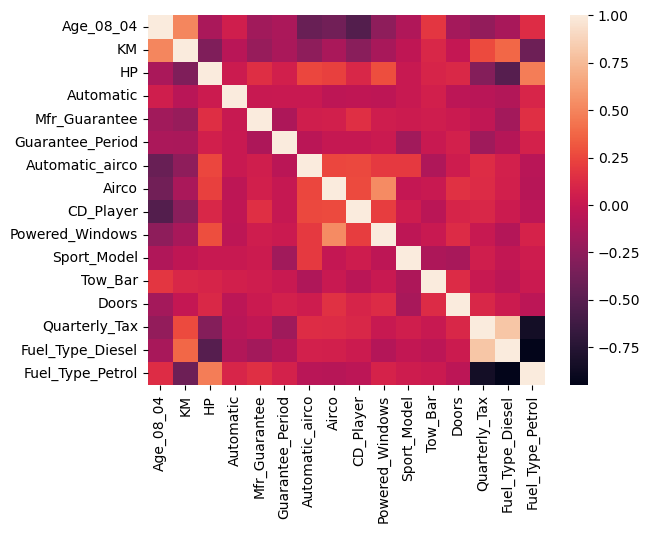

In [7]:
corr = train_X.corr()
sns.heatmap(corr)

<Axes: >

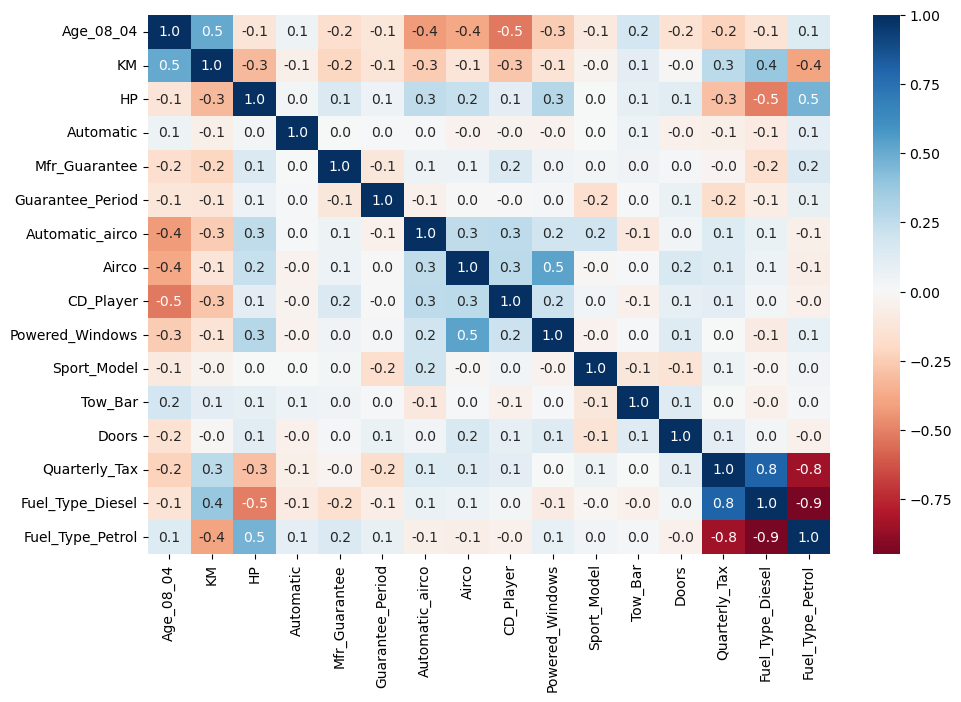

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [9]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)


LinearRegression()

In [10]:
print(pd.DataFrame({'Predictor': train_X.columns, 'coefficient': car_lm.coef_}))

           Predictor  coefficient
0          Age_08_04  -110.189172
1                 KM    -0.019544
2                 HP    35.756835
3          Automatic   655.613809
4      Mfr_Guarantee   142.907233
5   Guarantee_Period    74.011715
6    Automatic_airco  3004.084172
7              Airco    83.694732
8          CD_Player   348.574639
9    Powered_Windows   516.794680
10       Sport_Model   478.372120
11           Tow_Bar  -213.312422
12             Doors   220.631699
13     Quarterly_Tax    16.169935
14  Fuel_Type_Diesel  1980.028708
15  Fuel_Type_Petrol  1857.645507


In [11]:
regressionSummary(test_y, car_lm.predict(test_X))



Regression statistics

                      Mean Error (ME) : 66.0755
       Root Mean Squared Error (RMSE) : 1197.2318
            Mean Absolute Error (MAE) : 929.5707
          Mean Percentage Error (MPE) : -0.1101
Mean Absolute Percentage Error (MAPE) : 9.3825


##  Exhaustive

In [36]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
# we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [41]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

In [42]:
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

In [43]:
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

,n,r2adj,AIC,Age_08_04,Automatic_airco,HP,KM
0,1,0.768163,15340.942374,True,False,False,False
1,2,0.823620,15106.548070,True,True,False,False
2,3,0.843504,15004.556481,True,True,True,False
3,4,0.853578,14948.260322,True,True,True,True


## Backward Elimination

In [44]:
def train_model(variables):
          model = LinearRegression()
          model.fit(train_X[list(variables)], train_y)
          return model
def score_model(model, variables):
          return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
score_model, verbose=True)
print(best_variables)

Variables: Age_08_04, Automatic_airco, HP, KM
Start: score=14948.26
Step: score=14948.26, remove None
['Age_08_04', 'Automatic_airco', 'HP', 'KM']


## Forward Elimination

In [45]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: Age_08_04, Automatic_airco, HP, KM
Start: score=16598.48, constant
Step: score=15340.94, add Age_08_04
Step: score=15106.55, add Automatic_airco
Step: score=15004.56, add HP
Step: score=14948.26, add KM
Step: score=14948.26, add None
['Age_08_04', 'Automatic_airco', 'HP', 'KM']


## Stepwise Elimination

In [46]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model,
verbose=True)
print(best_variables)

Variables: Age_08_04, Automatic_airco, HP, KM
Start: score=16598.48, constant
Step: score=15340.94, add Age_08_04
Step: score=15106.55, add Automatic_airco
Step: score=15004.56, add HP
Step: score=14948.26, add KM
Step: score=14948.26, unchanged None
['Age_08_04', 'Automatic_airco', 'HP', 'KM']


In [47]:
test_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
509,512,TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-...,10900,46,11,2000,53700,Petrol,97,1,...,1,1,0,0,0,1,0,0,0,0
435,438,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-D...,10895,53,4,2000,79800,Petrol,110,0,...,0,1,0,0,0,1,0,0,0,0
321,323,TOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-Doors,10750,36,9,2001,36269,Petrol,110,1,...,1,1,0,0,0,1,0,0,0,1
1055,1060,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6500,70,11,1998,178800,Diesel,72,0,...,0,1,0,0,1,1,0,0,0,0
288,290,TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-D...,11895,44,1,2001,44218,Petrol,97,1,...,0,1,0,0,0,1,1,0,0,1


### Predicting the car prices of 2 cars with four important specifications

In [48]:
final_predictors = [ 'Age_08_04', 'Automatic_airco','HP','KM']
final_outcome = 'Price'
train_X = pd.get_dummies(train_df[final_predictors], drop_first=True)
train_y = train_df[final_outcome]
train_lm = LinearRegression()
train_lm.fit(train_X, train_y)


LinearRegression()

In [49]:
test_X = pd.get_dummies(test_df[final_predictors], drop_first=True)
test_y = test_df[final_outcome]
test_lm = train_lm.predict(test_X)
result = pd.DataFrame({'Predicted':test_lm, 'Actual': test_y, 'Residual': test_y - test_lm})
print(result.head(20))

         Predicted  Actual     Residual
509   11930.248340   10900 -1030.248340
435   11027.845487   10895  -132.845487
321   13888.013674   10750 -3138.013674
1055   6401.417217    6500    98.582783
288   12319.567137   11895  -424.567137
48    14797.741395   17950  3152.258605
1403   7985.248236    7000  -985.248236
952   10398.165975    8400 -1998.165975
1097   6505.380277    7250   744.619723
204   11096.239652   12950  1853.760348
978    9794.499045    8745 -1049.499045
404   10487.786112    9450 -1037.786112
1338   7520.270412    7499   -21.270412
754    8961.904018    9950   988.095982
1189   6778.380806    8500  1721.619194
948    8603.040847    7750  -853.040847
1079   6057.776027    8950  2892.223973
1108   6970.792401    8250  1279.207599
107   16439.150062   17450  1010.849938
1065   6638.923039    6550   -88.923039


In [50]:
regressionSummary(test_y, test_lm)


Regression statistics

                      Mean Error (ME) : 37.5407
       Root Mean Squared Error (RMSE) : 1357.7938
            Mean Absolute Error (MAE) : 1038.3326
          Mean Percentage Error (MPE) : -0.8976
Mean Absolute Percentage Error (MAPE) : 10.4315


## Calculating  Residuals 

0.7460869565217392


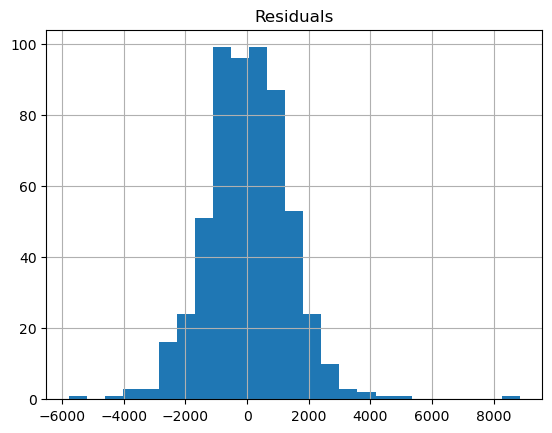

In [51]:
test_lm_pred = train_lm.predict(test_X)
all_residuals = test_y - test_lm_pred
#Determine the percentage of datapoint with a residual in [-1406, 1406] = approx. 75%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

Text(0.5, 0, 'Training')

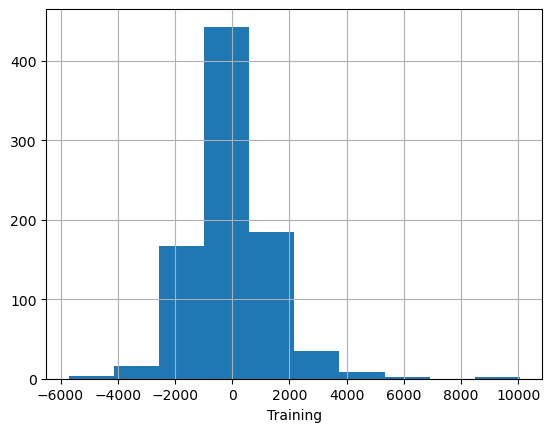

In [52]:
train_e = train_y - train_lm.predict(train_X)
fig, ax = plt.subplots()
ax = train_e.hist()
ax.set_xlabel('Training')

Text(0.5, 0, 'Testing')

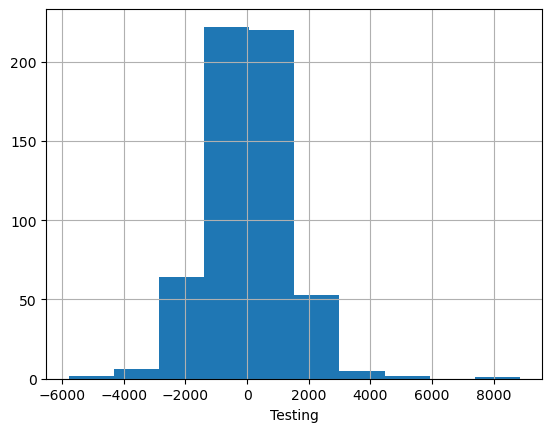

In [53]:
valid_e = test_y - train_lm.predict(test_X)
fig, ax = plt.subplots()
ax = valid_e.hist()
ax.set_xlabel('Testing')

### Comparing error rates for Training and Testing 

C:\Users\karan\AppData\Local\Temp\ipykernel_30960\730610106.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)


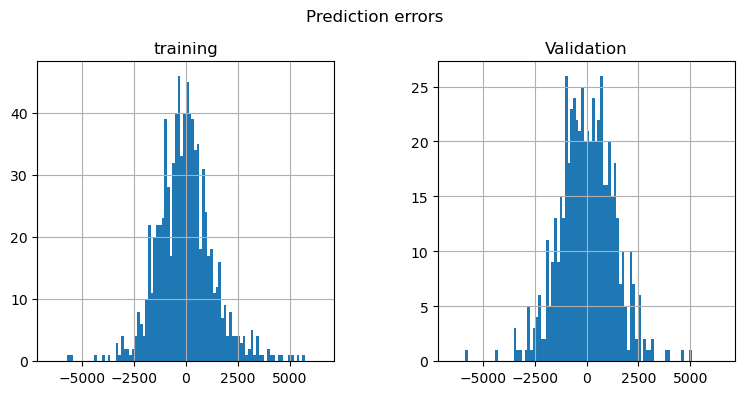

In [54]:
pred_error_train = pd.DataFrame({'residual': train_e,'dat set' :'training'})
pred_error_valid = pd.DataFrame({'residual': valid_e,'dat set' :'validation'})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9, 4)
common = {'bins': 100, 'range':[-6500, 6500]}
pred_error_train.hist(ax=axes[0],**common)
pred_error_valid.hist(ax=axes[1], **common)

axes[0].set_title('training')
axes[1].set_title('Validation')
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## Taking 2 random variables from Test Set 

In [55]:
newtest = test_X.head(2)

In [56]:
newtest.head()

,Age_08_04,Automatic_airco,HP,KM
509,46,0,97,53700
435,53,0,110,79800


### Car prices prediction in Test Dataset

In [57]:
car_lm_pred = train_lm.predict(newtest)
print(car_lm_pred)

[11930.24834017 11027.84548727]


In [58]:
linear_meanerror= regressionSummary(test_y, test_lm)



Regression statistics

                      Mean Error (ME) : 37.5407
       Root Mean Squared Error (RMSE) : 1357.7938
            Mean Absolute Error (MAE) : 1038.3326
          Mean Percentage Error (MPE) : -0.8976
Mean Absolute Percentage Error (MAPE) : 10.4315


### Checking the accuracy of the model

In [59]:
train_lm.score(test_X,test_y)

0.8495371356349961

In [60]:
score = r2_score(test_y,train_lm.predict(test_X))
print(score)

0.8495371356349961


#                                    K N N Reggressor Algorithm 

In [61]:
train_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1238,1245,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7750,75,6,1998,82256,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0
1085,1091,TOYOTA Corolla 2.0 DSL LIFTB LINEA LUNA 4/5-Doors,7950,79,2,1998,131500,Diesel,72,0,...,1,1,0,1,0,1,0,0,0,0
680,684,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7950,61,8,1999,102106,Petrol,110,0,...,1,1,0,0,1,1,0,0,0,0
593,597,TOYOTA Corolla LIFTBACK 1.4 16V VVTI TERRA 4/5...,10950,50,7,2000,22648,Petrol,97,1,...,1,1,1,0,0,0,0,1,0,1
647,651,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6950,68,1,1999,117000,Diesel,72,0,...,0,1,0,0,1,1,0,0,0,0


In [62]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']

outcome = ['Price']
train_A = pd.get_dummies(train_df[predictors], drop_first=True)
train_B = train_df[outcome]
test_A = pd.get_dummies(test_df[predictors], drop_first=True)
test_B = test_df[outcome]



In [66]:
New_test = pd.DataFrame([{'Age_08_04':46, 'KM':53700, 'HP':60, 'Automatic':0,'Mfr_Guarantee':0,'Guarantee_Period':3,'Automatic_airco':0,
'Airco':1,'CD_Player':1,'Powered_Windows':1,'Sport_Model':0,'Tow_Bar':0,'Doors':3, 'Quarterly_Tax':150,'Fuel_Type_Diesel':1,'Fuel_Type_Petrol':0},
                            {'Age_08_04':53, 'KM':69000, 'HP':110, 'Automatic':1,'Mfr_Guarantee':1,'Guarantee_Period':7,'Automatic_airco':0,
'Airco':0,'CD_Player':0,'Powered_Windows':1,'Sport_Model':1,'Tow_Bar':1,'Doors':4, 'Quarterly_Tax':250,'Fuel_Type_Diesel':0,'Fuel_Type_Petrol':1}])
New_test

,Age_08_04,KM,HP,Automatic,Mfr_Guarantee,Guarantee_Period,Automatic_airco,Airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Doors,Quarterly_Tax,Fuel_Type_Diesel,Fuel_Type_Petrol
0,46,53700,60,0,0,3,0,1,1,1,0,0,3,150,1,0
1,53,69000,110,1,1,7,0,0,0,1,1,1,4,250,0,1


## Normalizing the variables 

In [67]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_A[[ 'Age_08_04', 'KM', 'Fuel_Type_Diesel','Fuel_Type_Petrol', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']])



StandardScaler()

In [84]:
train_Norm = pd.DataFrame(scaler.transform(train_A[['Age_08_04', 'KM', 'Fuel_Type_Diesel','Fuel_Type_Petrol', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']]),columns=['zAge_08_04', 'zKM', 'zFuel_Type_Diesel','zFuel_Type_Petrol', 'zHP', 'zAutomatic','zMfr_Guarantee','zGuarantee_Period','zAutomatic_airco',
'zAirco','zCD_Player','zPowered_Windows','zSport_Model','zTow_Bar','zDoors', 'zQuarterly_Tax'])

valid_Norm = pd.DataFrame(scaler.transform(test_A[['Age_08_04', 'KM', 'Fuel_Type_Diesel','Fuel_Type_Petrol', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']]),columns=['zAge_08_04', 'zKM', 'zFuel_Type_Diesel','zFuel_Type_Petrol', 'zHP', 'zAutomatic','zMfr_Guarantee','zGuarantee_Period','zAutomatic_airco',
'zAirco','zCD_Player','zPowered_Windows','zSport_Model','zTow_Bar','zDoors', 'zQuarterly_Tax'])

New_testNorm = pd.DataFrame(scaler.transform(test_A[['Age_08_04', 'KM', 'Fuel_Type_Diesel','Fuel_Type_Petrol', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']]), columns=['zAge_08_04', 'zKM', 'zFuel_Type_Diesel','zFuel_Type_Petrol', 'zHP', 'zAutomatic','zMfr_Guarantee','zGuarantee_Period','zAutomatic_airco',
'zAirco','zCD_Player','zPowered_Windows','zSport_Model','zTow_Bar','zDoors', 'zQuarterly_Tax'])


## Scatter Plot 

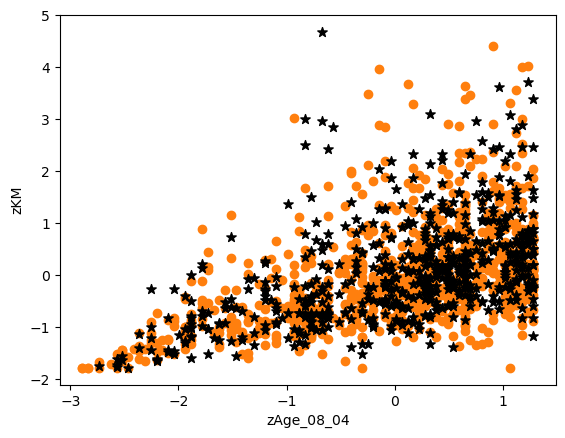

In [87]:
fig, ax = plt.subplots()
subset = test_B.loc[test_B['Price']=='Price']
ax.scatter(train_Norm.zAge_08_04, train_Norm.zKM, marker='o', label='Price',color='C1')
ax.scatter(New_testNorm.zAge_08_04, New_testNorm.zKM, marker='*',label='New household', color='black', s=50)

plt.xlabel('zAge_08_04') #set x-axis label
plt.ylabel('zKM') # set y-axis label
plt.show()                 


## K = 5

In [88]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(train_Norm,train_B)
score1 = r2_score(test_B,knn_5.predict(valid_Norm))
knn_5.predict(valid_Norm)
five=knn_5.predict(New_testNorm)
print(score1)



0.8264540475377757


## K=10

In [89]:
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_10.fit(train_Norm,train_B)
knn_10.predict(valid_Norm)
Ten = knn_10.predict(New_testNorm)
score2 = r2_score(test_B,knn_10.predict(valid_Norm))
print(score2)


0.8309004143295012


## Regression Summary for K = 5 

In [90]:
knn_meanerror=regressionSummary(test_B,knn_5.predict(valid_Norm))
print(knn_meanerror)


Regression statistics

                      Mean Error (ME) : 41.8922
       Root Mean Squared Error (RMSE) : 1458.2313
            Mean Absolute Error (MAE) : 1100.4320
          Mean Percentage Error (MPE) : -1.4698
Mean Absolute Percentage Error (MAPE) : 10.9097
None


## Regression Summary for K = 10

In [91]:
regressionSummary(test_B,knn_10.predict(valid_Norm))


Regression statistics

                      Mean Error (ME) : 92.9767
       Root Mean Squared Error (RMSE) : 1439.4296
            Mean Absolute Error (MAE) : 1073.6539
          Mean Percentage Error (MPE) : -1.3796
Mean Absolute Percentage Error (MAPE) : 10.6471


# Random Forest Algorithm

In [92]:
train_data=train_df.head()
test_data = test_df.head()
train_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1238,1245,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7750,75,6,1998,82256,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0
1085,1091,TOYOTA Corolla 2.0 DSL LIFTB LINEA LUNA 4/5-Doors,7950,79,2,1998,131500,Diesel,72,0,...,1,1,0,1,0,1,0,0,0,0
680,684,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7950,61,8,1999,102106,Petrol,110,0,...,1,1,0,0,1,1,0,0,0,0
593,597,TOYOTA Corolla LIFTBACK 1.4 16V VVTI TERRA 4/5...,10950,50,7,2000,22648,Petrol,97,1,...,1,1,1,0,0,0,0,1,0,1
647,651,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6950,68,1,1999,117000,Diesel,72,0,...,0,1,0,0,1,1,0,0,0,0


In [93]:

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic','Mfr_Guarantee','Guarantee_Period','Automatic_airco',
'Airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar','Doors', 'Quarterly_Tax']

outcome = 'Price'
train_dataX = pd.get_dummies(train_data[predictors], drop_first=True)
train_datay = train_data[outcome]

test_dataX = pd.get_dummies(train_data[predictors], drop_first=True)
test_datay = train_data[outcome]



In [94]:
clf = RandomForestRegressor(n_estimators = 10,random_state=0)

In [95]:
clf.fit(train_dataX, train_datay)

RandomForestRegressor(n_estimators=10, random_state=0)

In [96]:
y_pred = clf.predict(test_dataX)
y_pred

array([8030., 8530., 8130., 9910., 7250.])

In [97]:
rf_meanerror= regressionSummary(test_datay, clf.predict(test_dataX))


Regression statistics

                      Mean Error (ME) : -60.0000
       Root Mean Squared Error (RMSE) : 568.9991
            Mean Absolute Error (MAE) : 476.0000
          Mean Percentage Error (MPE) : -1.5983
Mean Absolute Percentage Error (MAPE) : 5.3974


In [98]:
score3 = r2_score(test_datay,clf.predict(test_dataX))
score3

0.8276405451448041

# Comparision between Models with Accuracy


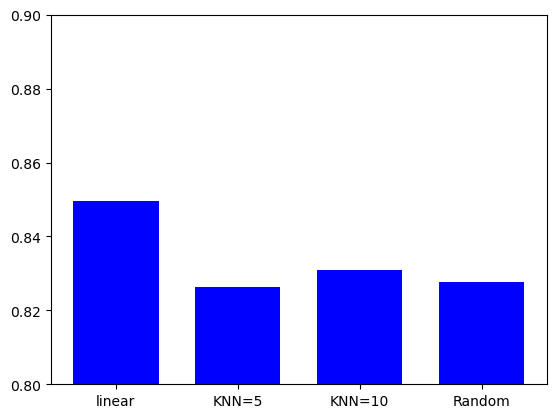

In [99]:
x_label=['linear','KNN=5','KNN=10','Random']
y_label=[0.8495371356349961,0.8264540475377757,0.8309004143295012,0.8276405451448041]
plt.bar(x_label,y_label, color ='Blue',width = 0.7)
low = min(y_label)
high = max(y_label)
plt.ylim(0.8,0.9)
plt.show()